<font size="+5">#02. Machine Learning & Regresion Lineal</font>

<ul>
    <li>Resolver dudas → Pregunta en <img src="https://discord.com/assets/f9bb9c4af2b9c32a2c5ee0014661546d.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutoriales → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Reservar Clases → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Cargar Datos

> Si ejecutamos los siguientes comandos:

```python
import seaborn as sns
sns.get_dataset_names()
```

> Veremos una lista de posibles `datasets` que podemos descargar desde internet y convertirlos directamente a un `DataFrame` de `pandas`. Por ejemplo:

```python
sns.load_dataset(name='mpg')
```

In [3]:
import seaborn as sns

sns.get_dataset_names()
df = sns.load_dataset(name='tips')

# Seleccionar 2 Variables para la Regresión

> - Variable Objetivo `y`
> - Variable Explicativa `X`

In [5]:
total = df[['total_bill']]  
explanatory = df[['tip']]

# Scatterplot con las Variables

> Deberíamos observar en la gráfica que los puntos podrían relacionarse a través de una línea que los cruce.
>
> Si no es así, debemos seleccionar otras variables.

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

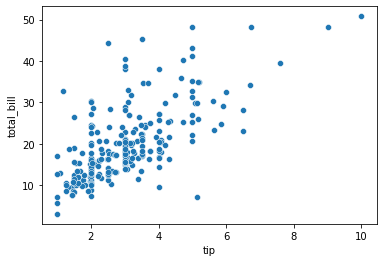

In [6]:
sns.scatterplot(x = 'tip',y = 'total_bill', data = df)

# Modelo de Regresión Lineal `LinearRegression()`

## Entrenar Modelo

> 1. **Necesidad:** Entrenar Modelo
> 2. **Solución: Función** `fit()`

In [7]:
from sklearn.linear_model import LinearRegression
ajuste = LinearRegression()
ajuste.fit(X = explanatory, y = total)

ajuste.__dict__
## Ecuacion y = ax + b --> y = 0.10x + 0.92

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([[4.34771421]]),
 '_residues': array([10464.72995515]),
 'rank_': 1,
 'singular_': array([21.56878478]),
 'intercept_': array([6.75028377])}

$$
y = 4.34 \cdot x + 6.75 \\
totalbill = 4.34 \cdot tip + 6.75
$$

$$
\sum \alpha \beta \cdot
$$

## Realizar Predicciones

> - `model.predict()`

In [17]:
y = ajuste.predict(X=explanatory)

In [18]:
dfsel = df[['tip', 'total_bill']].copy()

In [19]:
dfsel['pred'] = y

In [20]:
dfsel.head()

,tip,total_bill,pred
0,1.01,16.99,11.141475
1,1.66,10.34,13.967489
2,3.50,21.01,21.967283
3,3.31,23.68,21.141218
4,3.61,24.59,22.445532


# Visualizar Modelo

> 1. Los **datos reales**.
> 2. **Modelo: las predicciones** con la ecuación matemática.

In [23]:
ajuste.predict(X=[[7]])

array([[37.18428322]])

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

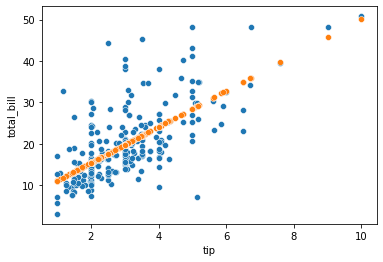

In [22]:
sns.scatterplot(x = 'tip', y = 'total_bill', data = df)
sns.scatterplot(x = 'tip', y = 'pred', data = dfsel)

# Interpretar Modelo

> 1. Especifica la **Fórmula Matemática** del Modelo.
> 2. **Interpreta los Coeficientes** de la Ecuación Matemática.

In [24]:
ajuste.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([[4.34771421]]),
 '_residues': array([10464.72995515]),
 'rank_': 1,
 'singular_': array([21.56878478]),
 'intercept_': array([6.75028377])}

$$
totalbill = 4.34 \cdot tip + 6.75
$$

# Realidad vs Predicciones

> ¿Cómo de bueno es nuestro modelo?
>
> 1. Si pasamos las predicciones como una nuevo columna del `DataFrame`, podremos observar que **las predicciones de nuestro modelo pueden no coincidir con la realidad**.
>
>    - `df['pred'] = predicciones`
>
> 2. ¿Cómo medimos el **error de nuestro modelo**? ¿Cómo de bueno es nuestro modelo para describir la realidad?
>    - `df.sample(10)` para comprobar si las predicciones de nuestro modelo coinciden con la realidad...

In [26]:
dfsel = df[['total_bill','tip']].copy()

In [29]:
dfsel = df[['total_bill','tip']].copy()
dfsel[['pred']] = ajuste.predict(X = explanatory)

dfsel
dfsel.sample(10)

,total_bill,tip,pred
31,18.35,2.50,17.619569
87,18.28,4.00,24.141141
93,16.32,4.30,25.445455
52,34.81,5.20,29.358398
86,13.03,2.00,15.445712
190,15.69,1.50,13.271855
141,34.30,6.70,35.879969
96,27.28,4.00,24.141141
178,9.60,4.00,24.141141
192,28.44,2.56,17.880432


In [30]:
total_bill

NameError: name 'total_bill' is not defined

In [36]:
error = dfsel['total_bill'] - dfsel['pred']

In [39]:
error2 = error**2

In [42]:
residuos = error2.sum()

In [43]:
rss = error2.sum()

In [44]:
rss

10464.729955151066

In [46]:
ajuste.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([[4.34771421]]),
 '_residues': array([10464.72995515]),
 'rank_': 1,
 'singular_': array([21.56878478]),
 'intercept_': array([6.75028377])}

In [47]:
rss

10464.729955151066

In [53]:
tss = ((df.total_bill - df.total_bill.mean())**2).sum()

In [54]:
rss/tss

0.5433834136483237

In [55]:
1 - rss/tss

0.45661658635167635

In [58]:
ajuste

LinearRegression()

In [59]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [61]:
ajuste.score(X=df[['tip']],y=df[['total_bill']])

0.45661658635167635

Nuestro modelo tiene una capacidad del 45.66% de explicar la varaibilidad del `total_bill`

In [33]:
dfsel['total_bill'] - dfsel['pred']

0       5.848525
1      -3.627489
2      -0.957283
3       2.538782
4       2.144468
         ...    
239    -3.458752
240    11.734288
241     7.224288
242     3.461216
243    -1.013426
Length: 244, dtype: float64

In [31]:
dfsel[['total_bill']]-dfsel[['pred']]

,pred,total_bill
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
239,NaN,NaN
240,NaN,NaN
241,NaN,NaN
242,NaN,NaN


# Objetivos Alcanzados

_Haz doble click sobre esta celda y pon una `X` dentro de las casillas [X] si crees que has superado los objetivos:_

- [ ] Entender **cómo la máquina optimiza un modelo**, que no es más que encontrar **los números** una ecuación matemática.
- [ ] La `función` como elemento indivisible de la programación. Como un **átomo**: el núcleo de todo.
- [ ] Entender **qué sucede dentro del ordenador** cuando ejecutamos una función. Descargamos código de internet, o es un proceso local del ordenador?
- [ ] Usar **la programación como una herramienta**, como un medio hacia un fin. No como el fin en sí mismo.
- [ ] Entender que la estadística no es una ciencia perfecta. Sino que trata de **aproximarse a la realidad** de la mejor forma posible.
- [ ] **Medir el error** del modelo no es más que comparar la predicción contra la realidad.
- [ ] De la misma manera que en el código existen diversas formas de obtener el mismo resultado, en la programación existen **diversos algoritmos/modelos/ecuaciones para predecir la misma variable**.